# Neural Network Regression: PCOS Follicle Number Estimation

## Imports

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 

# Neural Network 
import keras
from keras.models import Sequential # Most common. Linear stack of layers. 
from keras.layers import Dense # All neurons connected to each other
from keras.optimizers import Adam # Commonly used. Extension of SGD
from tensorflow.keras.losses import Huber

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Dataset

In [2]:
# Import data 
df = pd.read_csv('/Users/taniarizwan/Documents/University/Third Year 2022/Bmen 415/Project/PCOS_data_without_infertility.csv')

# Drop ID columns. Remove L&R follicle numbers since we are predicting Ave. This will bias data. Remove NaN column
dataset= df.drop(['Sl. No', 'Patient File No.', 'Follicle No. (L)', 'Follicle No. (R)', 'Unnamed: 45'], axis=1) 
x=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]
y = dataset['Follicle No. (Ave)'] 

# Remove null value in X 
x[x.isnull().any(axis=1)] 
X = x.dropna(axis='columns')

## Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Define the Neural Network

In [4]:
# Architecture
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Compile model 
model.compile(loss=Huber(delta=1.0),optimizer=Adam(learning_rate=0.005))

# Model Training
model.fit(X_train, y_train, epochs=300, batch_size=100, validation_data=(X_test, y_test))
# Epoch means we are training on dataset 100 times
# Batch_size tells us how many samples the model will see before updating weights 
# (# samples to update model during training)

Epoch 1/300
4/4 [==============================] - 0s 39ms/step - loss: 5.3031 - val_loss: 4.4534
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 4.0869 - val_loss: 3.5710
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 3.4769 - val_loss: 3.1352
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 3.2034 - val_loss: 2.9013
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 3.0747 - val_loss: 2.7652
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 2.9957 - val_loss: 2.6850
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 2.9539 - val_loss: 2.6365
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 2.9359 - val_loss: 2.6068
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 2.9235 - val_loss: 2.5922
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 2.9168 - val_loss: 2.5860
Epoch 11/300
4/4 [==========

## Evaluation

### Testing 

In [5]:
# Evaluate model on testing data. Computes MSE
mse_test = model.evaluate(X_test, y_test)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

6/6 [==============================] - 0s 733us/step - loss: 2.1435
1.464061070200284


In [6]:
# predictions on new data
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R-Squared Test:", r2_test)

6/6 [==============================] - 0s 841us/step
R-Squared Test: 0.2223826052546103


### Training

In [7]:
# Evaluate model on training data. Computes MSE
mse_train = model.evaluate(X_train, y_train)
rmse_train = np.sqrt(mse_train)
print(rmse_train)

12/12 [==============================] - 0s 602us/step - loss: 1.8125
1.3462956290982138


In [8]:
# predictions on test
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-Squared Train:", r2_train)

12/12 [==============================] - 0s 551us/step
R-Squared Train: 0.4382730321858127


## Visualization

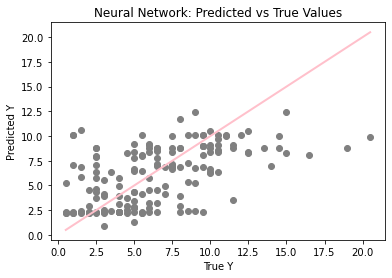

In [12]:
plt.scatter(y_test, y_test_pred, c='grey')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='pink', lw=2)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('Neural Network: Predicted vs True Values')
plt.show()